In [34]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [35]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
test_images.shape

(10000, 28, 28)

In [38]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

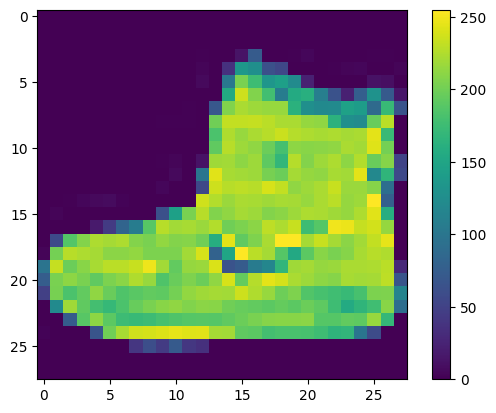

In [39]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
train_images = train_images / 255.0
test_images = test_images / 255.0

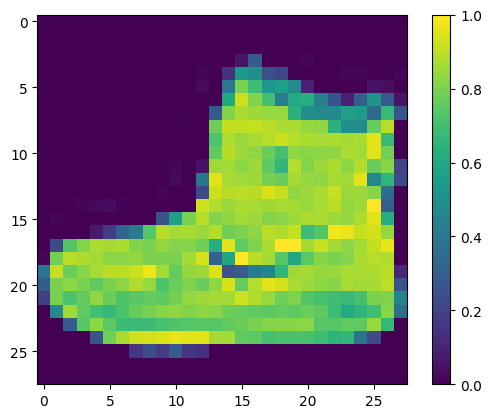

In [41]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

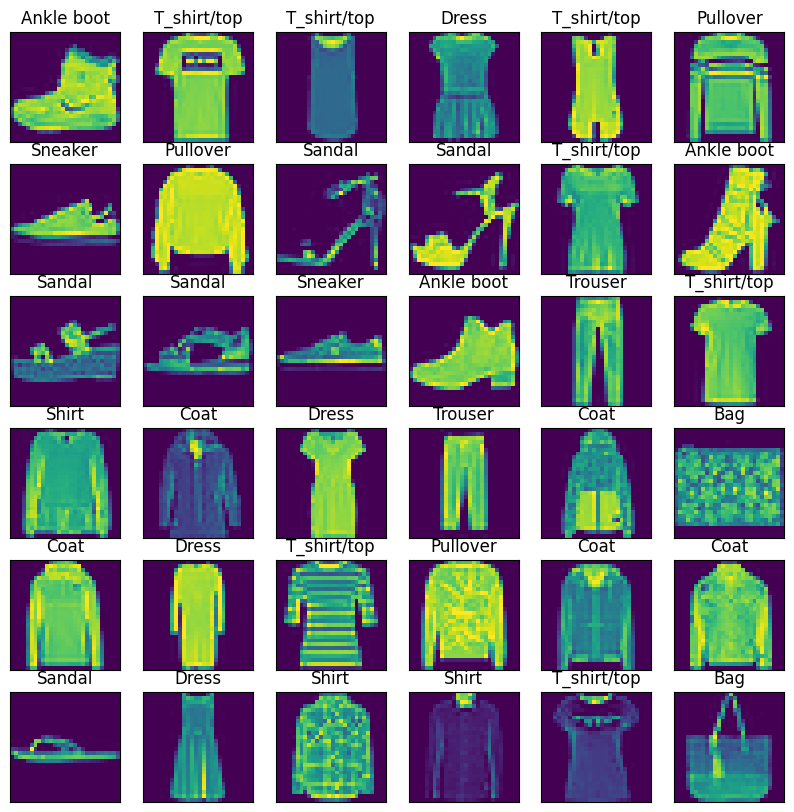

In [42]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

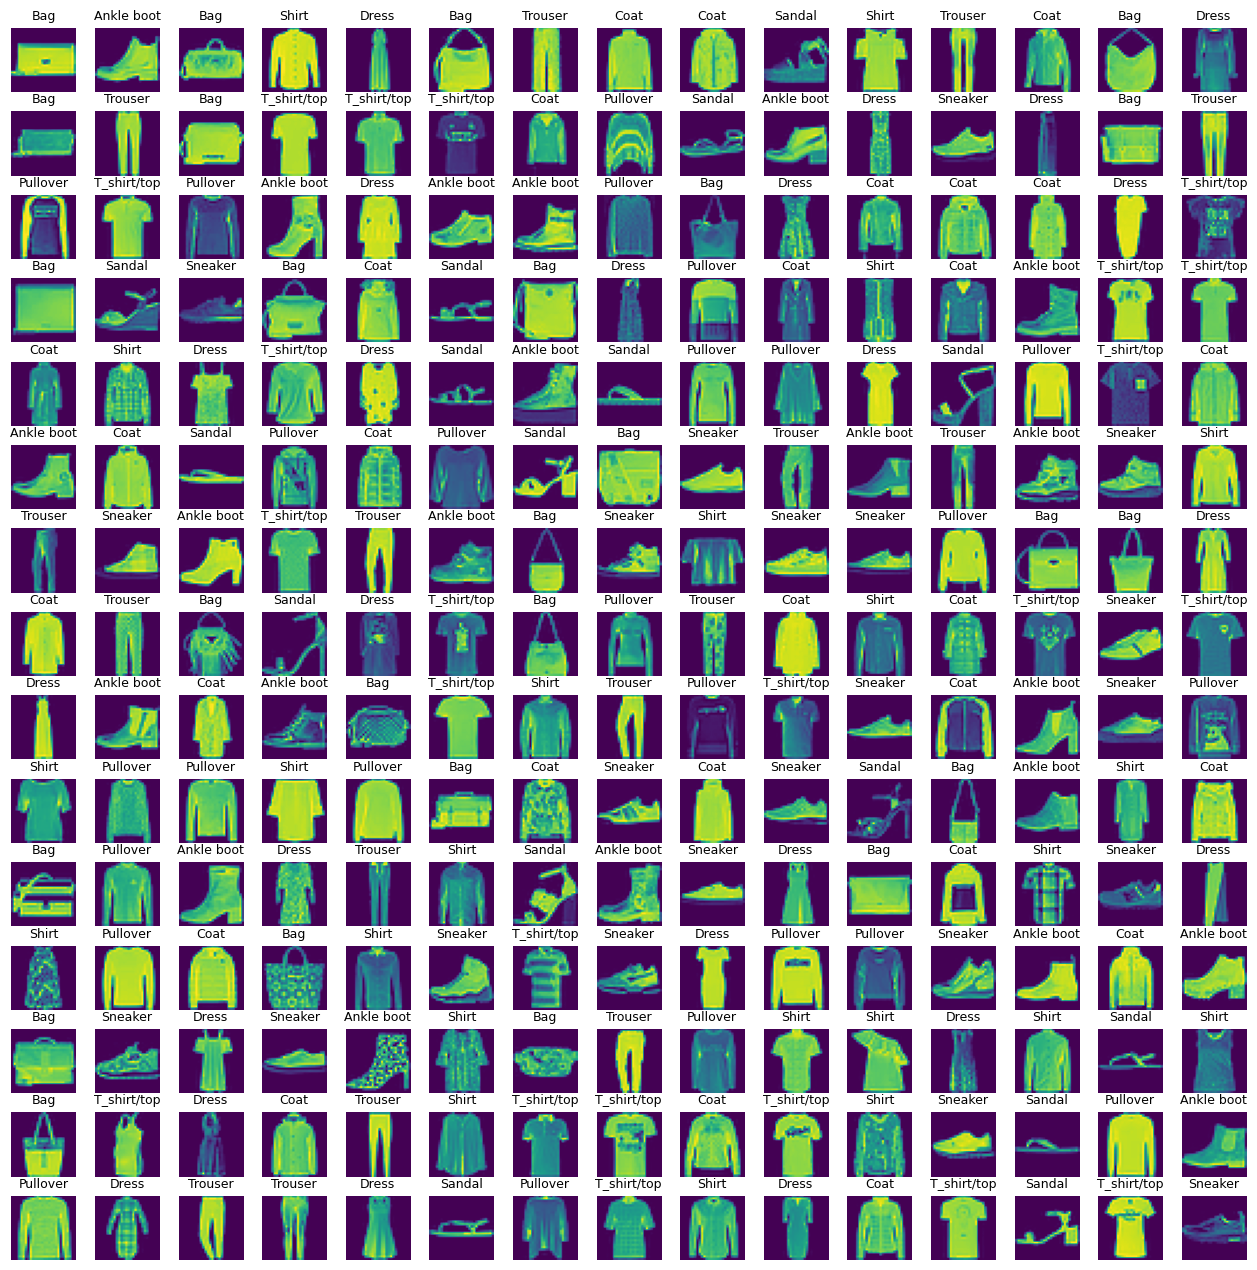

In [43]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# Neural network

In [44]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [45]:
# # define the keras model
# #iniciadores para relu: glorot
# #iniciadores para sigmoid: he
# model = Sequential()
# # model.add(Dense(12, input_shape=(20,), activation='relu'))
# # model.add(Dense(8, activation='relu'))
# # model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

# # Accuracy: 80.55
# model.add(Dense(64, input_shape=(30,), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

# # Accuracy: 79.81
# # model.add(Dense(64, input_shape=(20,), activation='elu'))
# # model.add(Dense(32, activation='elu'))
# # model.add(Dense(1, kernel_initializer="he_uniform", activation='sigmoid'))

# # Accuracy: 79.34
# # model.add(Dense(64, input_shape=(20,), activation='selu'))
# # model.add(Dense(32, activation='selu'))

In [46]:
# from keras.optimizers import Adam
# # compile the keras model
# learning_rate = 0.01
# optimizer = Adam(learning_rate=learning_rate)

In [47]:
# model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [48]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [50]:
# Crear modelo secuencial
model = Sequential([
  layers.Flatten(input_shape=(28, 28)),  # Convertir imagen en un vector unidimensional
  layers.Dense(128, activation='relu'), # Capa oculta con 128 neuronas
  layers.Dense(10)                      # Capa de salida con 10 neuronas correspondientes a las 10 clases de prendas
])

# Compilar modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar modelo
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 3.6502 - accuracy: 0.6946 - val_loss: 0.7930 - val_accuracy: 0.6858
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7082 - accuracy: 0.7434 - val_loss: 0.7707 - val_accuracy: 0.7335
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6377 - accuracy: 0.7687 - val_loss: 0.5937 - val_accuracy: 0.7846
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5583 - accuracy: 0.8011 - val_loss: 0.5446 - val_accuracy: 0.8073
Epoch 5/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5192 - accuracy: 0.8193 - val_loss: 0.5854 - val_accuracy: 0.8015
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5091 - accuracy: 0.8237 - val_loss: 0.5899 - val_accuracy: 0.8011
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5012 - accuracy: 0.8298 - val_loss: 0.5501 - val_accura

In [51]:
# evaluate the keras model
loss,accuracy = model.evaluate(train_images, train_labels)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4009 - accuracy: 0.8642
Accuracy: 86.42


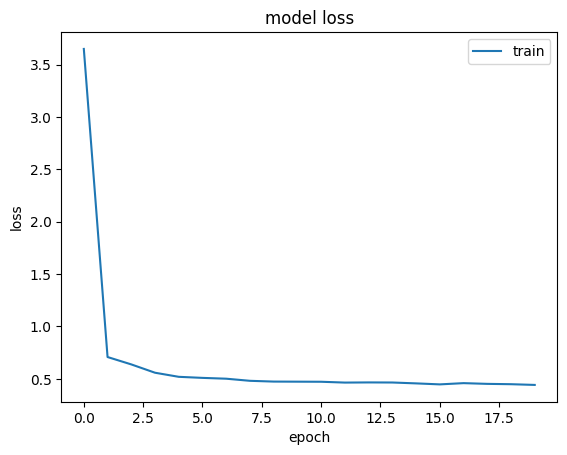

In [52]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

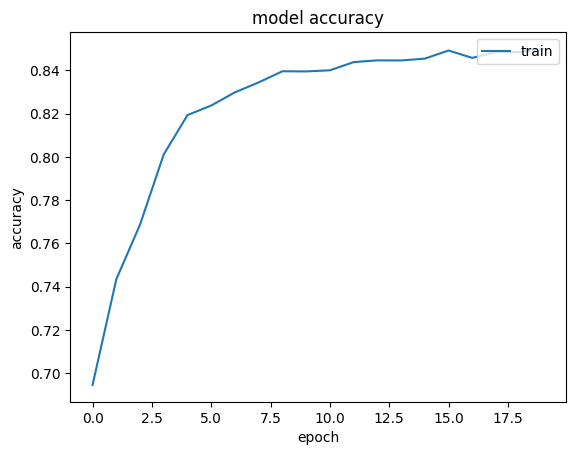

In [53]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()